## Final Project - Time Series Analysis Model
## Mishandled Bag Ratio - US Airlines Industry


In [47]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab as pl


%matplotlib inline

In [48]:
#Read in data from source 
df= pd.read_csv("C:/Users/fcama/Desktop/MBR_DS_Proj/V8_HUB1_Bag_Perf.csv")
df.head()

,Year,Month,DOM,DOW,DOW2,Date,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,...,%(+/-),A0,D0,num_gate_chg,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other,Misc_Reason
0,2016,Jan,1,F,5-F,1/1/2016,73717,58781,58781,0.797387,...,-24%,69.3,55.4,76,1,5,1,0,4,0
1,2016,Jan,2,J,6-J,1/2/2016,74144,67703,126484,0.913129,...,-17%,71.5,61.3,50,1,12,2,10,0,0
2,2016,Jan,3,S,7-S,1/3/2016,84940,72571,199055,0.854380,...,-12%,73.5,59.9,62,0,4,1,2,1,AM ABR TSA
3,2016,Jan,4,M,1-M,1/4/2016,79386,73744,272799,0.928930,...,-19%,75.9,63.7,58,0,8,8,0,0,0
4,2016,Jan,5,T,2-T,1/5/2016,71323,62199,334998,0.872075,...,-15%,74.0,68.0,31,0,2,0,2,0,0


In [49]:
# change date format for time series analysis use
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [50]:
df.describe()
df.shape

(700, 27)

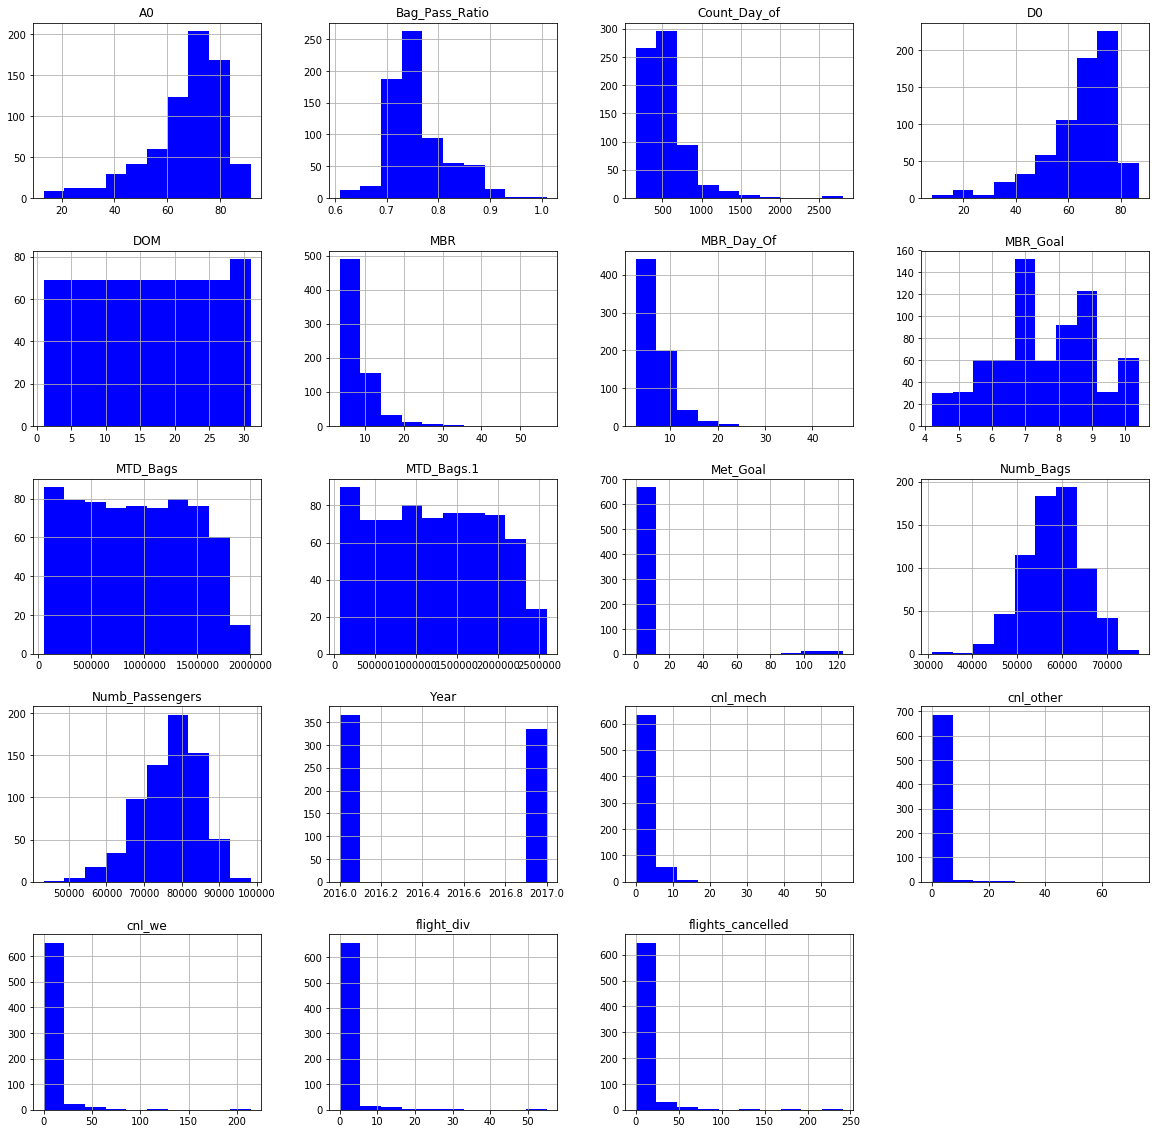

In [51]:
df.hist(color='blue', figsize=(20,20))
pl.show()

## US Calendar Holiday

In [52]:
df.corr()

,Year,DOM,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,MTD_Bags.1,MBR_Day_Of,Count_Day_of,MBR_Goal,MBR,Met_Goal,A0,D0,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other
Year,1.000000,-0.003533,0.105242,0.136093,0.028936,0.056988,0.014983,-0.134026,-0.124429,0.054992,-0.146699,0.225752,0.021743,0.096567,-0.056056,-0.041784,-0.167143,-0.025900,0.021916
DOM,-0.003533,1.000000,0.002805,-0.002902,0.994304,-0.005286,0.994971,-0.039057,-0.042462,0.014912,-0.036328,0.012886,0.030338,0.062538,0.009781,-0.004073,0.002979,-0.000215,-0.021896
Numb_Passengers,0.105242,0.002805,1.000000,0.791545,0.040356,-0.278930,0.049862,-0.100424,0.118700,0.016604,-0.130634,-0.015431,-0.139723,-0.208665,-0.196181,-0.196195,0.166112,-0.229232,-0.110557
Numb_Bags,0.136093,-0.002902,0.791545,1.000000,0.045830,0.361408,0.038287,0.193350,0.374869,0.200840,0.141236,-0.073539,-0.176558,-0.297473,-0.171499,-0.143666,0.198897,-0.183461,-0.063417
MTD_Bags,0.028936,0.994304,0.040356,0.045830,1.000000,0.013452,0.997610,-0.017636,-0.012347,0.059835,-0.016833,0.000792,0.001890,0.030305,0.017023,0.001085,0.023420,0.002117,-0.020861
Bag_Pass_Ratio,0.056988,-0.005286,-0.278930,0.361408,0.013452,1.000000,-0.012136,0.462852,0.407027,0.275325,0.426662,-0.090477,-0.058333,-0.144814,0.033261,0.077021,0.050813,0.066259,0.071572
MTD_Bags.1,0.014983,0.994971,0.049862,0.038287,0.997610,-0.012136,1.000000,-0.030803,-0.023866,0.020107,-0.028743,0.014792,0.007953,0.034646,0.017800,0.000729,0.028202,0.000838,-0.020583
MBR_Day_Of,-0.134026,-0.039057,-0.100424,0.193350,-0.017636,0.462852,-0.030803,1.000000,0.966554,0.332352,0.980842,-0.144675,-0.641646,-0.716890,0.422549,0.509587,0.277483,0.481113,0.276614
Count_Day_of,-0.124429,-0.042462,0.118700,0.374869,-0.012347,0.407027,-0.023866,0.966554,1.000000,0.352037,0.936781,-0.151592,-0.678004,-0.771834,0.338973,0.430646,0.326987,0.388892,0.245477
MBR_Goal,0.054992,0.014912,0.016604,0.200840,0.059835,0.275325,0.020107,0.332352,0.352037,1.000000,0.327932,-0.069922,-0.287449,-0.336570,0.101832,0.115126,0.178587,0.089201,0.067642


In [53]:
from pandas.tseries.holiday import USFederalHolidayCalendar   # US holiday calendar
from pandas.tseries.offsets import CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())  # Excludes holidays, maybe for detrending
usb

<CustomBusinessDay>

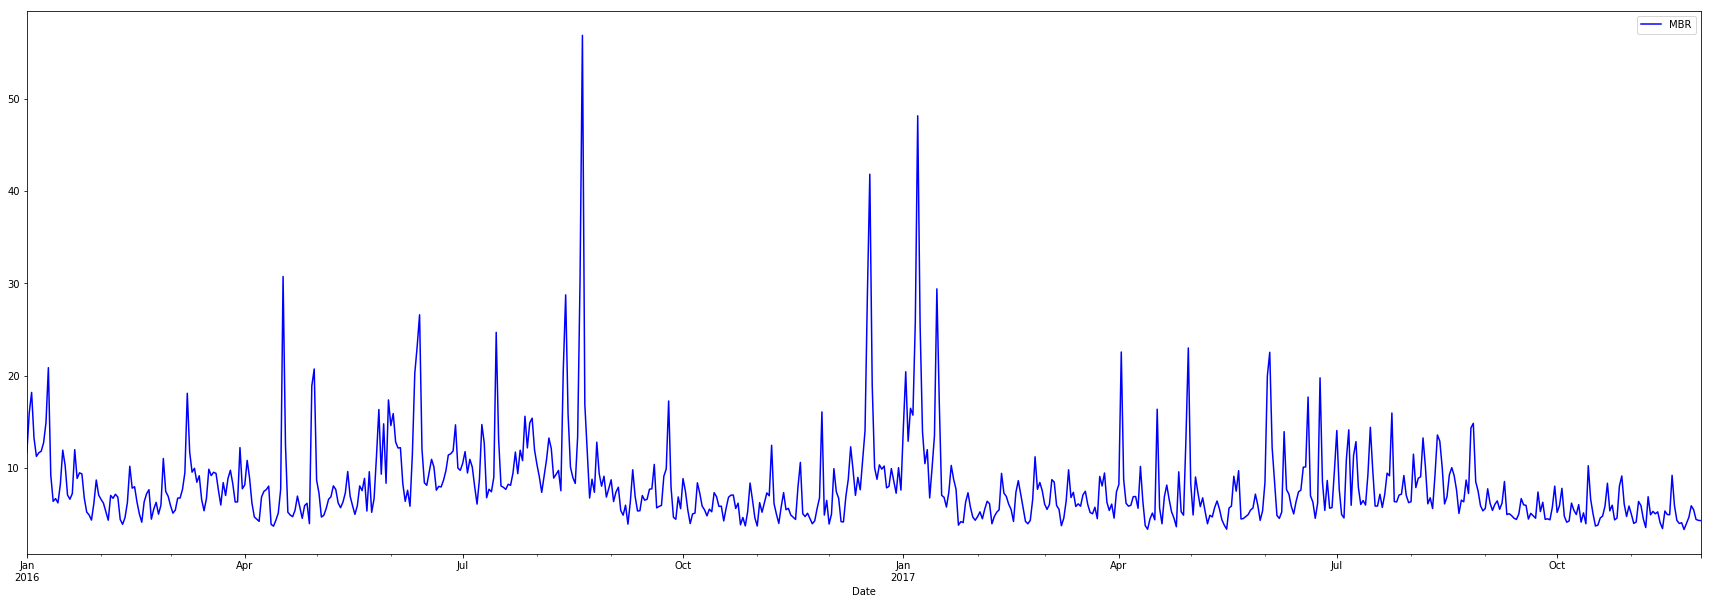

In [54]:
# Plot MBR over time
df[['MBR']].plot(color='blue', figsize=(30,10))

C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


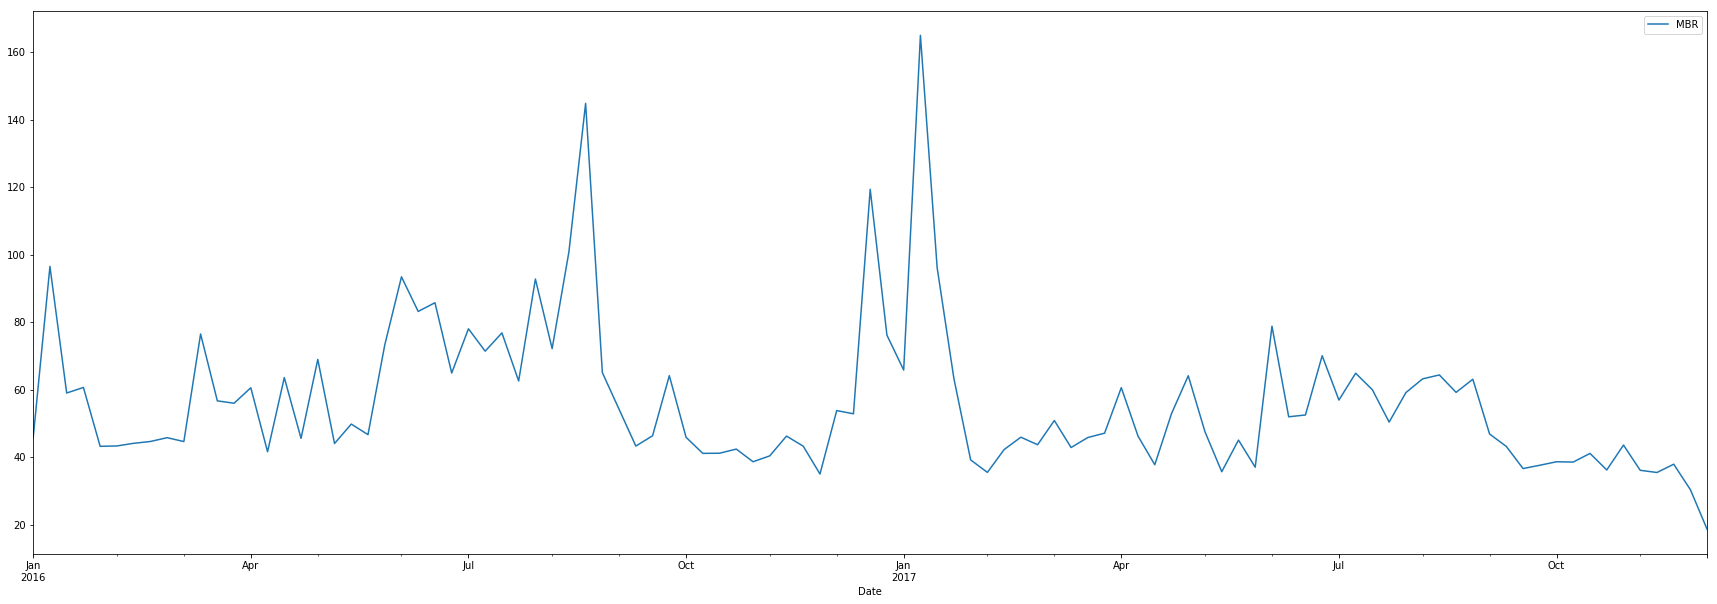

In [55]:
MBR_weekly = df[['MBR']].resample('W', 'sum', )
MBR_weekly.plot(figsize=(30,10))


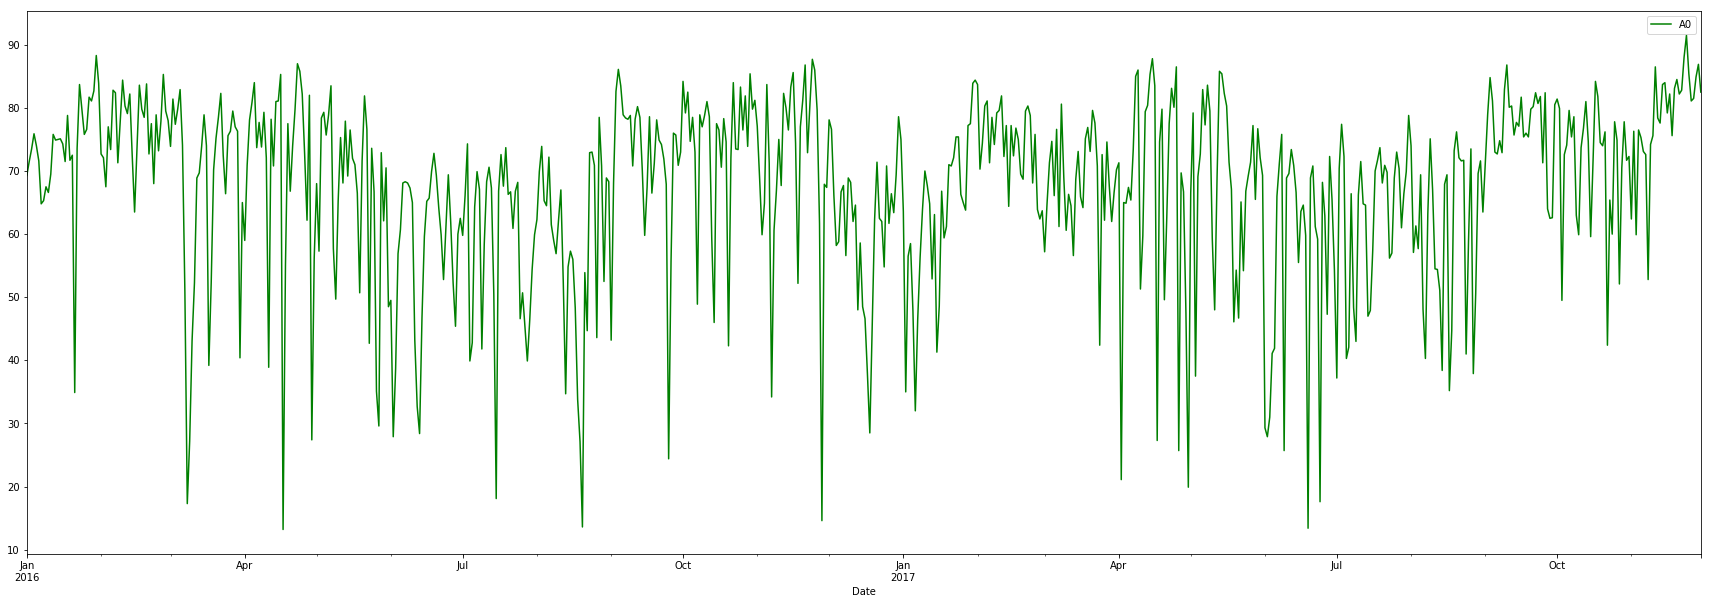

In [56]:
# Plot Arrival on time over time
df[['A0']].plot(color='green', figsize=(30,10))

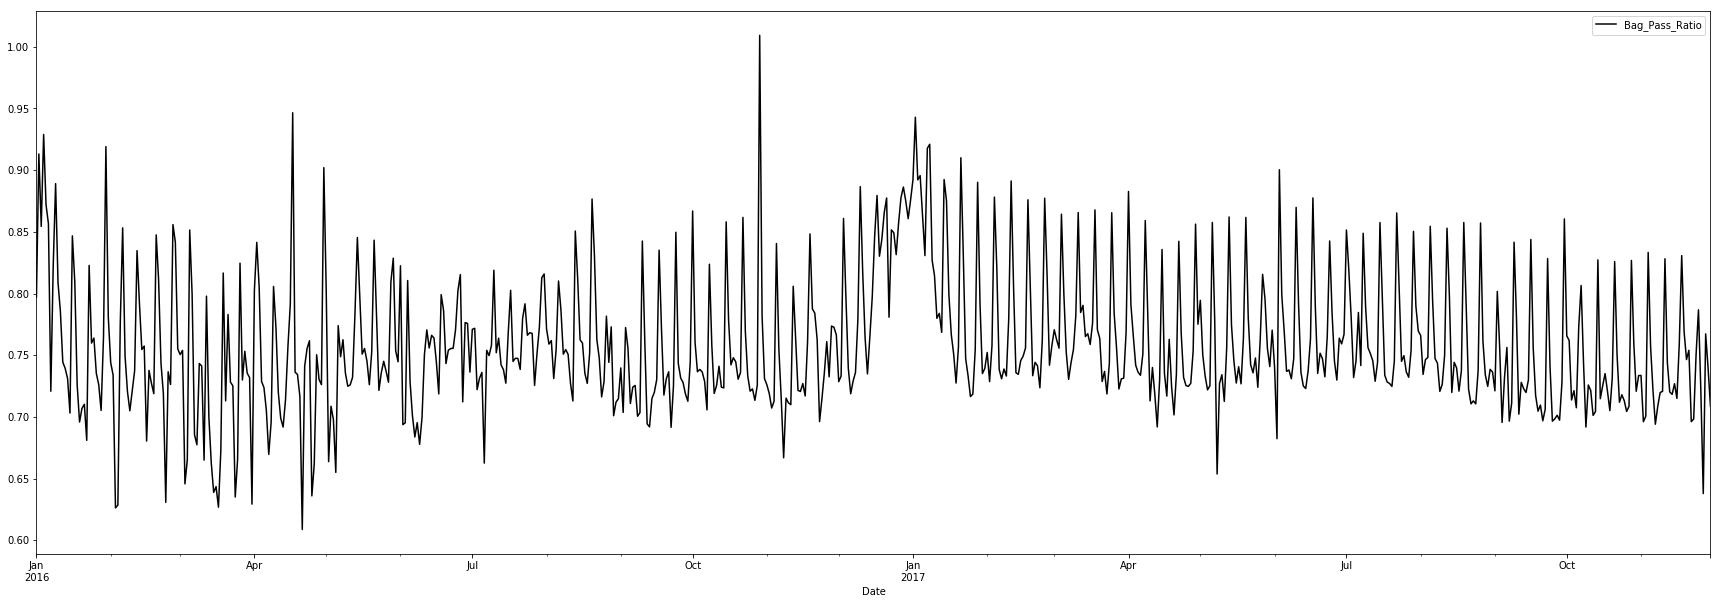

In [57]:
# Plot Arrival on time over time
df[['Bag_Pass_Ratio']].plot(color='K', figsize=(30,10))

In [58]:
Bag_Pass_Ratio_trans = df.Bag_Pass_Ratio*100
Bag_Pass_Ratio_trans.head()

Date
2016-01-01    79.738731
2016-01-02    91.312851
2016-01-03    85.437956
2016-01-04    92.892953
2016-01-05    87.207493
Name: Bag_Pass_Ratio, dtype: float64

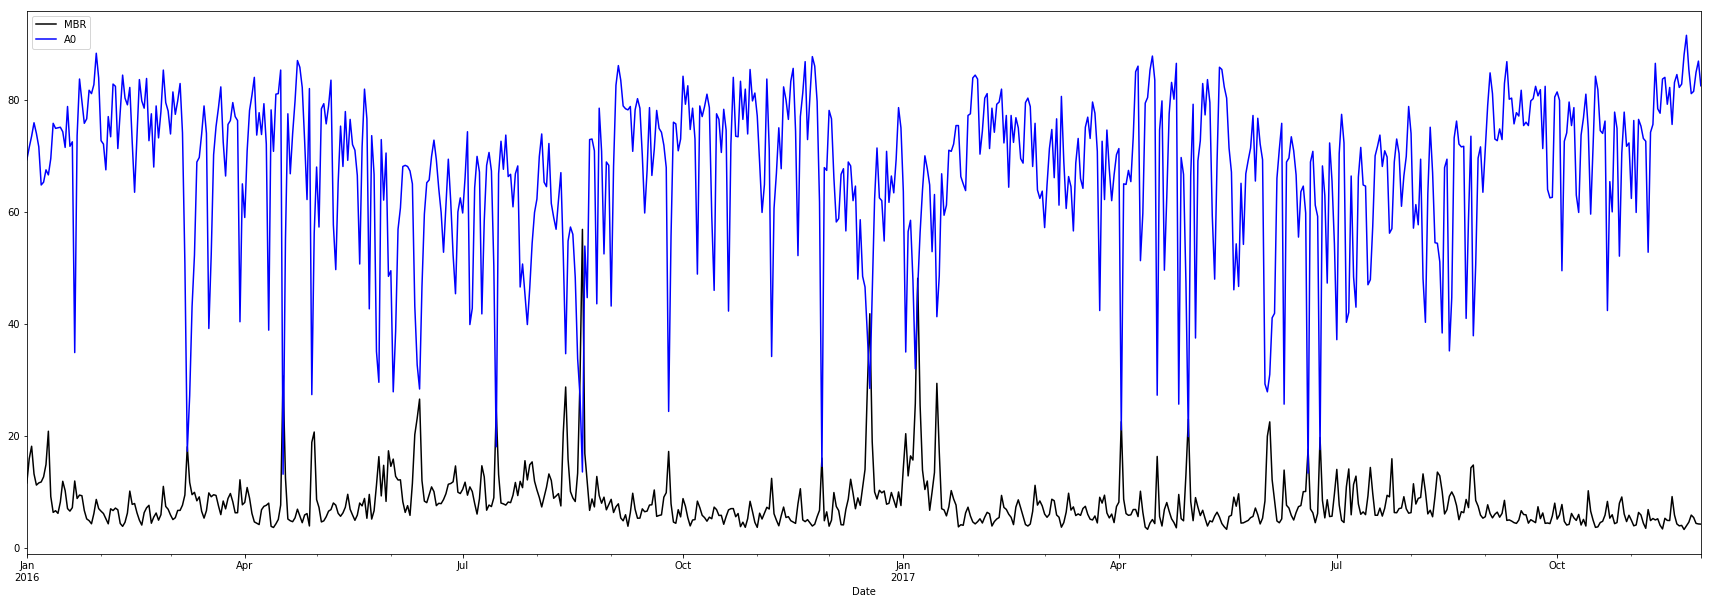

In [59]:
df[['MBR', 'A0']].plot(color=['k', 'blue', 'red'], figsize=(30,10))

## Autocorrection for different Lag values

In [60]:
df.MBR.autocorr(lag=1) # MBR Lag 1 

0.59001735015767875

In [61]:
df.MBR.autocorr(lag=2) # MBR Lag 2 

0.28103366965841675

In [62]:
df.MBR.autocorr(lag=3) # MBR Lag 3

0.1450635690223756

In [63]:
df.MBR.autocorr(lag=7) # MBR Lag 7

0.31595420009903902

## Autocorrection Plots
### We can plot the correlation coefficient for each lag variable.
The plot provides the lag number along the x-axis and the correlation coeeficient value between -1 and 1 on the y-axis.
The plot also includes a solid and dashed lines that indicate the 95% and 99% confidence interval for the ecorrelation values. Correlation values above these lines are more significant than those below the line providing a threshold or cutoff for selecting more relevant lag values.


C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 20, -0.2, 0.65]

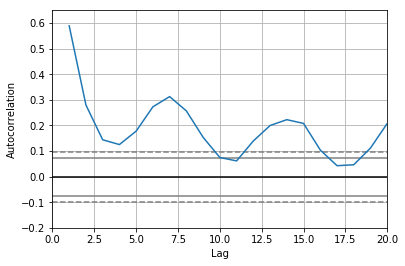

In [64]:
from pandas.tools.plotting import autocorrelation_plot

ax = autocorrelation_plot(df.MBR)
ax.axis([0,20,-.2,.65])

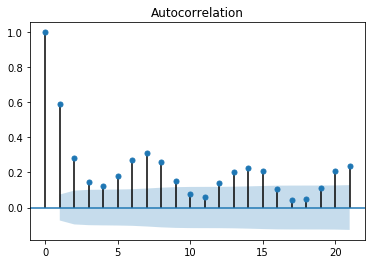

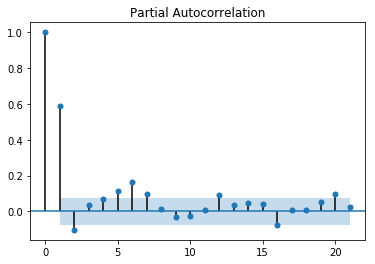

In [65]:
# Look at the plot as vertical line scatter plot.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df.MBR, lags=21)
plot_pacf(df.MBR, lags=21)
plt.show()

# Another useful statistic is the Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).
p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [66]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.MBR)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.785875
p-value: 0.000001
Critical Values:
	5%: -2.866
	1%: -3.440
	10%: -2.569


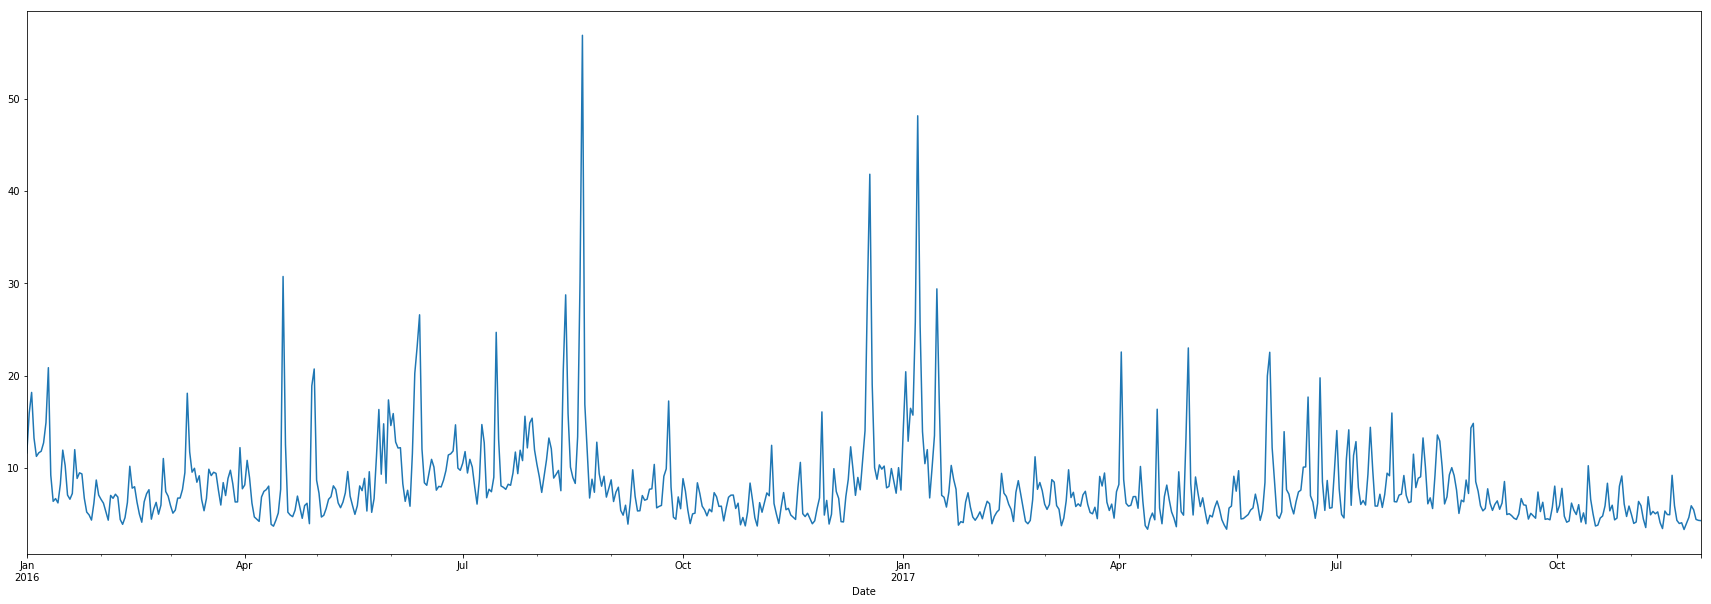

In [67]:
df.MBR.plot(figsize=(30,10))

#### Spliting the MBR data in a training and test set - using 75% of the data for training & 25% for testing

In [68]:
n = len(df.MBR)
train = df.MBR[:int(.75*n)]
test = df.MBR[int(.75*n):]

In [69]:
print train.index.min()
print train.index.max()

2016-01-01 00:00:00
2017-06-08 00:00:00


In [70]:
print test.index.min()
print test.index.max()

2017-06-09 00:00:00
2017-11-30 00:00:00


2017-06-08 00:00:00


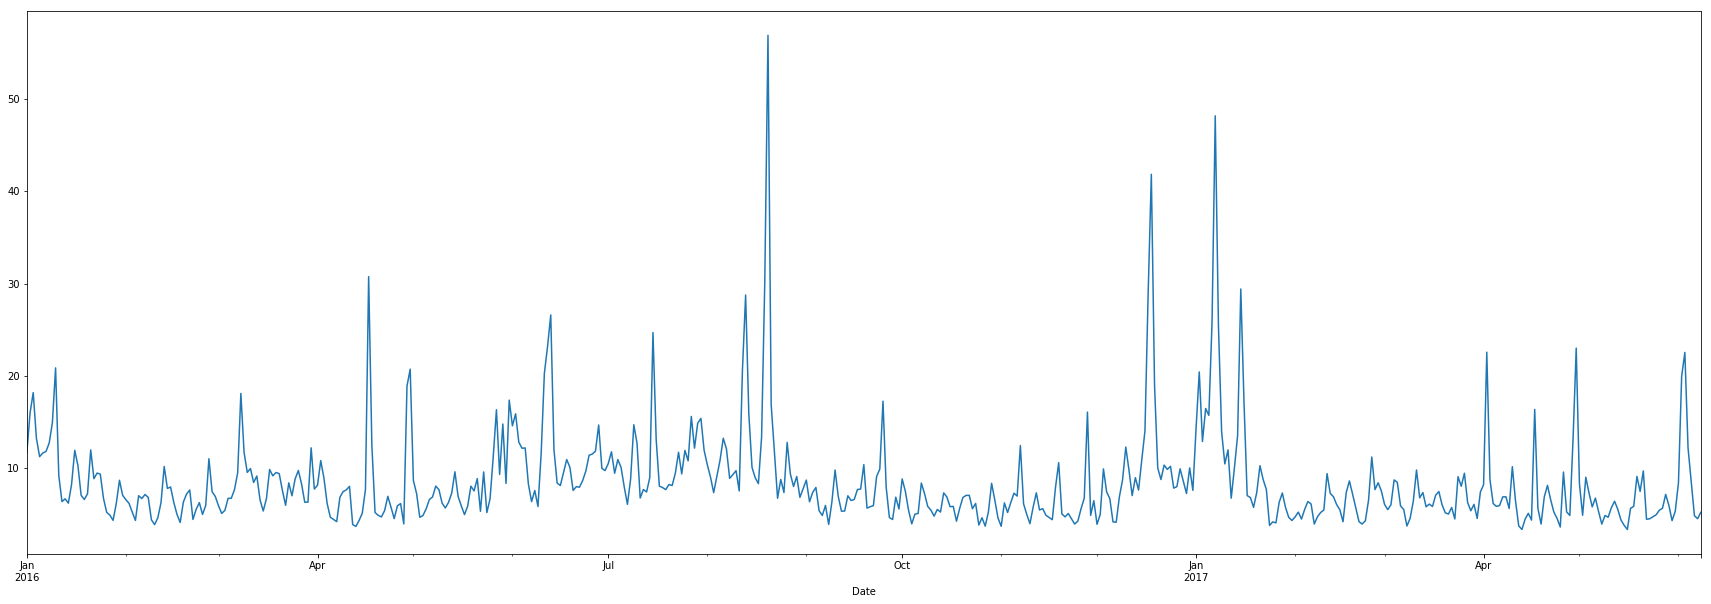

In [71]:
train.plot(figsize=(30,10))
print train.index.max()

2017-06-08 00:00:00


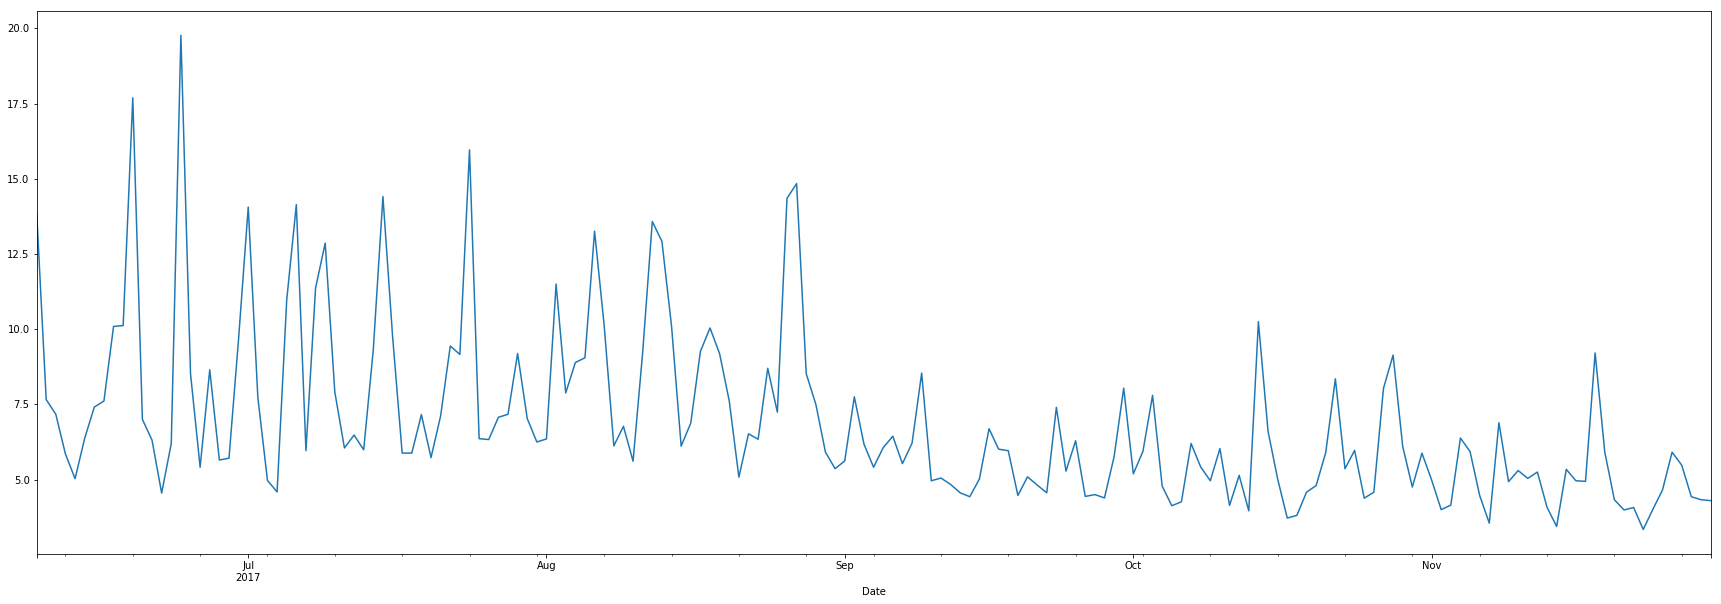

In [72]:
test.plot(figsize=(30,10))
print train.index.max()

# ARIMA Time Series Model

In [73]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

In [74]:
from statsmodels.tsa.arima_model import ARIMA
# AR 3, I 0,  and MA 4 model
model = ARIMA(df.MBR, (3, 0, 4)).fit()
model.summary()

C:\Users\fcama\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    MBR   No. Observations:                  700
Model:                     ARMA(3, 4)   Log Likelihood               -1915.007
Method:                       css-mle   S.D. of innovations              3.724
Date:                Tue, 05 Dec 2017   AIC                           3848.014
Time:                        15:18:38   BIC                           3888.973
Sample:                    01-01-2016   HQIC                          3863.847
                         - 11-30-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2350      0.641     12.840      0.000       6.978       9.492
ar.L1.MBR      2.1873      0.026     83.145      0.000       2.136       2.239
ar.L2.MBR     -2.1711      0.032    -68.267      0.000      -2.233      -2.109
ar.L3.MBR      0.9401      0.026     36.306      0.000       0.889       0.991
ma.L1.MBR     -1.6439      0.047    -35.009      0.000      -1.736      -1.552
ma.L2.MBR      1.1714      0.066     17.879      0.000       1.043       1.300
ma.L3.MBR     -0.0115      0.066     -0.174      0.862      -0.141       0.118
ma.L4.MBR     -0.3140      0.040     -7.787      0.000      -0.393      -0.235
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6239           -0.7828j            1.0010           -0.1429
AR.2            0.6239           +0.7828j            1.0010            0.1429
AR.3            1.0616           -0.0000j            1.0616           -0.0000
MA.1            0.6265           -0.7902j            1.0084           -0.1433
MA.2            0.6265           +0.7902j            1.0084            0.1433
MA.3            1.2387           -0.0000j            1.2387           -0.0000
MA.4           -2.5285           -0.0000j            2.5285           -0.5000
-----------------------------------------------------------------------------
"""

In [75]:
test.shape

(175L,)

In [76]:
predictions = model.predict(
    "2017-06-19","2017-11-30",
    dynamic=False)

print("Mean absolute error: ", mean_absolute_error(df.MBR["2017-06-19":"2017-11-30"], predictions))

('Mean absolute error: ', 1.7181540641655269)


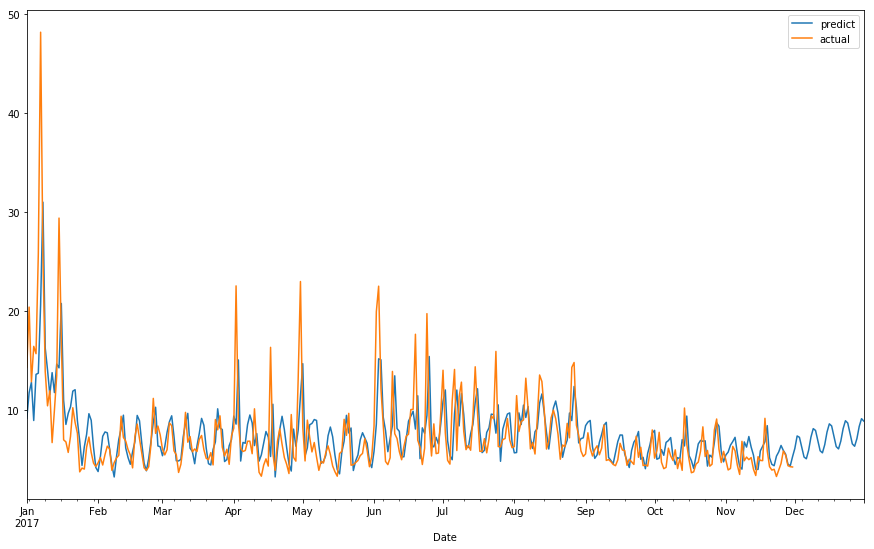

In [77]:
# Visualize the actual and prediction on the same plot
fig, axes = plt.subplots()
model.predict("2017-01-01","2017-12-31").plot(ax = axes, figsize=(15,9))
df.MBR["2017-01-01":"2017-11-30"].plot(ax = axes, figsize=(15,9))
plt.legend(["predict","actual"])

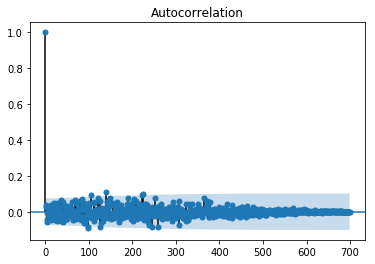

In [78]:
plot_acf(model.resid)
plt.show()

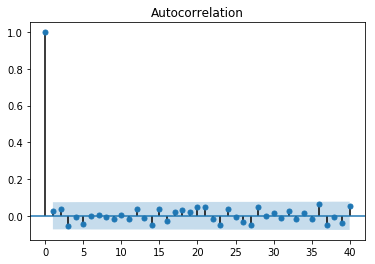

In [79]:
plot_acf(model.resid, lags=40)
plt.show()

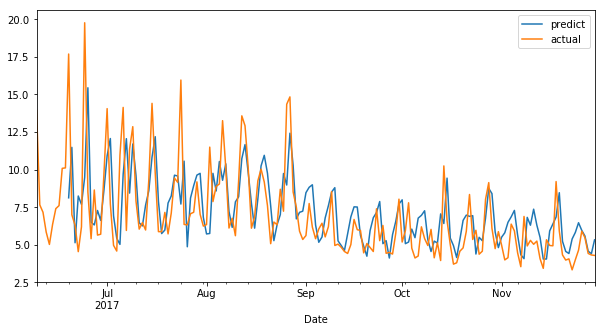

In [80]:
# Visualize the actual and prediction on the same plot
fig, axes = plt.subplots()
predictions.plot(ax = axes, figsize=(10,5))
test.plot(ax = axes, figsize=(10,5))
plt.legend(["predict","actual"])

In [81]:
predictions.tail()

2017-11-26    5.968457
2017-11-27    5.586461
2017-11-28    4.584473
2017-11-29    4.410194
2017-11-30    5.334978
Freq: D, dtype: float64

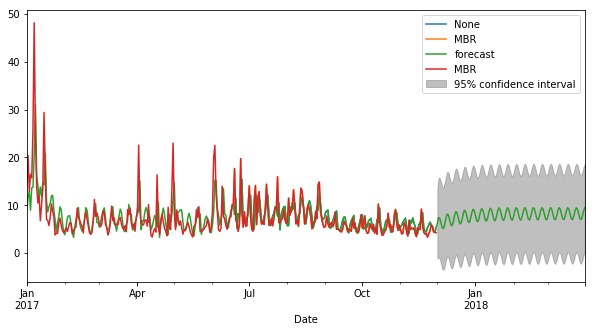

In [82]:
# Another way of plotting actual and prediction 
model.plot_predict("2017-01-01","2018-03-31", ax = axes)

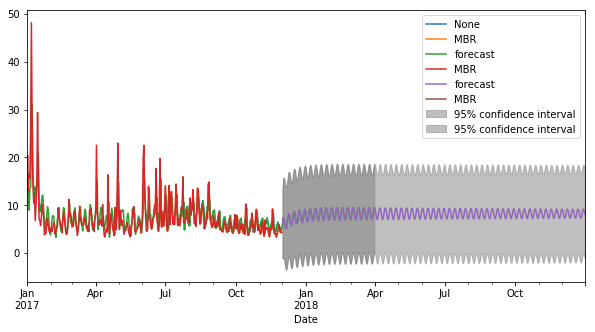

In [83]:
# Another way of plotting actual and prediction 
model.plot_predict("2017-12-01","2018-12-31", ax = axes)

In [85]:
#Read in data from source 
df_g= pd.read_csv("C:/Users/fcama/Desktop/MBR_DS_Proj/goals_18.csv")
df_g.tail(12)

,month_year,MBR_goal
48,1/1/2018,9.43
49,2/1/2018,6.49
50,3/1/2018,6.45
51,4/1/2018,6.26
52,5/1/2018,6.63
53,6/1/2018,8.09
54,7/1/2018,7.53
55,8/1/2018,8.08
56,9/1/2018,4.86
57,10/1/2018,4.96


# A useful statistic is the Durbin Watson statistic to see if you have captured all the autocorrelation
What is the 'Durbin Watson Statistic'
The Durbin Watson statistic is a number that tests for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic is always between 0 and 4. A value of 2 means that there is no autocorrelation in the sample. Values approaching 0 indicate positive autocorrelation and values toward 4 indicate negative autocorrelation. 


Read more: Durbin Watson Statistic https://www.investopedia.com/terms/d/durbin-watson-statistic.asp#ixzz50LtH8ac2 
Follow us: Investopedia on Facebook

In [86]:
import statsmodels.api as sm
sm.stats.durbin_watson(model.resid.values)

1.9514488411500066

# SARIMA Time Series Model

In [87]:
model2 = sm.tsa.statespace.SARIMAX(df.MBR, order=(1,0,2), seasonal_order=(1,1,1,52), simple_differencing=False)
res= model2.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                MBR   No. Observations:                  700
Model:             SARIMAX(1, 0, 2)x(1, 1, 1, 52)   Log Likelihood               -1866.968
Date:                            Tue, 05 Dec 2017   AIC                           3745.937
Time:                                    15:19:42   BIC                           3773.243
Sample:                                01-01-2016   HQIC                          3756.492
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9587      0.022     44.458      0.000       0.916       1.001
ma.L1         -0.4116      0.032    -12.761      0.000      -0.475      -0.348
ma.L2         -0.3772      0.047     -7.950      0.000      -0.470      -0.284
ar.S.L52      -0.1150      0.044     -2.626      0.009      -0.201      -0.029
ma.S.L52      -0.9876      0.608     -1.623      0.105      -2.180       0.205
sigma2        15.0243      8.825      1.703      0.089      -2.272      32.320
===================================================================================
Ljung-Box (Q):                      158.66   Jarque-Bera (JB):              5378.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX Time Series Model

In [88]:
# from statsmodels.tsa.sarimax_model import SARIMAX
# Variables
endog = df.loc['2016-01-01':'2017-11-30', 'MBR']
exog = sm.add_constant(df.loc['2016-01-01':'2017-11-30', 'Bag_Pass_Ratio'])

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,7),  seasonal_order=(1,1,1,52),  simple_differencing=False)
res = mod.fit(disp=False)
res.summary()

C:\Users\fcama\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                MBR   No. Observations:                  700
Model:             SARIMAX(1, 0, 7)x(1, 1, 1, 52)   Log Likelihood               -1836.023
Date:                            Tue, 05 Dec 2017   AIC                           3698.046
Time:                                    15:22:17   BIC                           3757.210
Sample:                                01-01-2016   HQIC                          3720.916
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004   6662.609   5.28e-08      1.000   -1.31e+04    1.31e+04
Bag_Pass_Ratio    22.0118      2.969      7.413      0.000      16.192      27.832
ar.L1              0.9977      0.035     28.308      0.000       0.929       1.067
ma.L1             -0.4563      0.028    -16.560      0.000      -0.510      -0.402
ma.L2             -0.3159      0.052     -6.072      0.000      -0.418      -0.214
ma.L3             -0.1260      0.053     -2.384      0.017      -0.230      -0.022
ma.L4             -0.0181      0.060     -0.302      0.763      -0.136       0.099
ma.L5              0.0059      0.054      0.110      0.912      -0.099       0.111
ma.L6              0.0196      0.050      0.387      0.698      -0.079       0.118
ma.L7             -0.0060      0.040     -0.151      0.880      -0.084       0.072
ar.S.L52          -0.0797      0.046     -1.726      0.084      -0.170       0.011
ma.S.L52          -0.9999     60.428     -0.017      0.987    -119.436     117.436
sigma2            13.6053    821.705      0.017      0.987   -1596.907    1624.118
===================================================================================
Ljung-Box (Q):                       52.10   Jarque-Bera (JB):              5063.94
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             2.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""